In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("Maternal Health Risk Data Set.csv")
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [14]:
df=df.drop(columns=['RiskLevel'])
df

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
0,25,130,80,15.0,98.0,86
1,35,140,90,13.0,98.0,70
2,29,90,70,8.0,100.0,80
3,30,140,85,7.0,98.0,70
4,35,120,60,6.1,98.0,76
...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80
1010,55,120,90,18.0,98.0,60
1011,35,85,60,19.0,98.0,86
1012,43,120,90,18.0,98.0,70


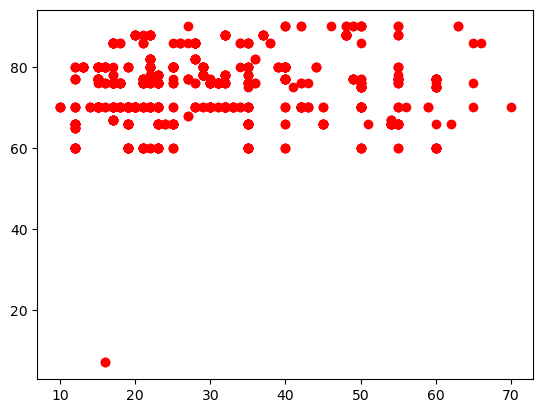

In [5]:
plt.scatter(df['Age'],df['HeartRate'],color='red')

In [16]:
from sklearn.ensemble import IsolationForest
clf=IsolationForest(contamination=0.1)
clf.fit(df)
predictions=clf.predict(df)
predictions

array([-1,  1,  1, ..., -1,  1,  1])

In [15]:
df.columns

Index(['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate'], dtype='object')

In [17]:
abn_ind=np.where(predictions<0)
abn_ind

(array([   0,    7,   20,   35,  105,  108,  110,  111,  114,  117,  123,
         124,  127,  130,  131,  137,  152,  166,  167,  180,  182,  191,
         210,  232,  237,  239,  248,  262,  263,  275,  276,  278,  317,
         319,  326,  337,  338,  339,  341,  362,  363,  370,  371,  373,
         413,  417,  419,  422,  426,  428,  432,  435,  442,  458,  471,
         482,  486,  502,  506,  535,  538,  539,  551,  552,  554,  583,
         584,  596,  599,  603,  631,  640,  644,  657,  658,  670,  679,
         683,  687,  689,  787,  849,  928,  939,  940,  955,  959,  961,
         962,  968,  970,  976,  982,  986,  988,  992,  994,  995, 1000,
        1002, 1010, 1011], dtype=int64),)

In [18]:
x=df.values

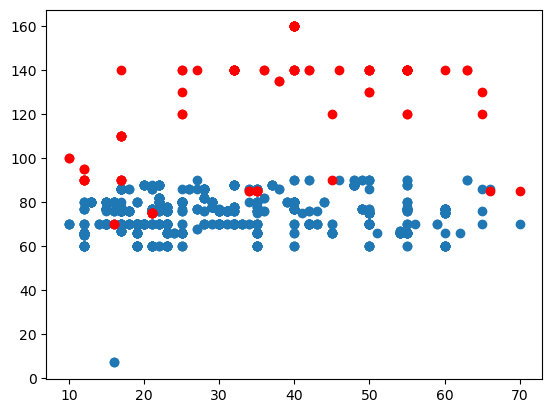

In [24]:

abn_ind=np.where(predictions<0)
plt.scatter(df['Age'],df['HeartRate'])
plt.scatter(x[abn_ind,0],x[abn_ind,1],color='red')

DBSCAN

In [25]:
from sklearn.cluster import DBSCAN
%matplotlib inline
from sklearn.datasets import make_circles

In [26]:
x,y=make_circles(n_samples=750,noise=0.1,factor=0.3)
x

array([[-0.10753853, -0.18327754],
       [ 0.84198697,  0.44919161],
       [ 0.23633962,  0.12212303],
       ...,
       [ 0.22246073,  0.38639413],
       [ 0.06435272,  0.21052628],
       [-0.33008314, -0.2086357 ]])

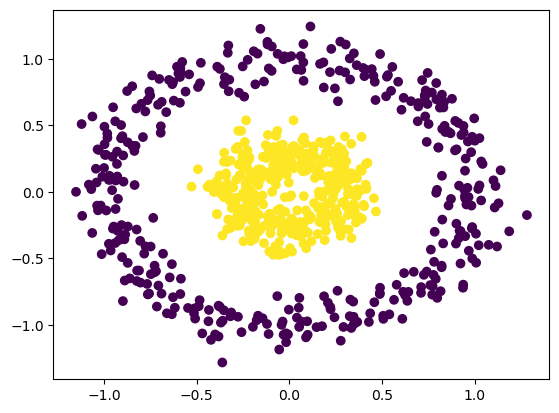

In [27]:
plt.scatter(x[:,0],x[:,1],c=y)

In [29]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=0.10)

In [30]:
dbscan.fit_predict(x)

array([ 0,  1,  0,  2,  1,  2,  0,  0,  3,  0,  4, -1, -1,  0,  5,  5,  3,
        0,  0,  6,  0,  0,  6,  7,  0,  4,  3,  0,  3,  0,  8,  0,  0,  0,
        3,  2,  0,  9,  1,  0,  0,  0,  1,  7, 12,  1,  0, -1,  0,  1,  0,
        0,  9,  0, 10, -1,  1,  5,  1,  8,  0, 11,  2,  1,  0,  0,  0,  0,
        7,  0,  0, 11,  3,  2,  0,  4,  7,  0,  0,  0,  7,  3,  8,  3,  0,
       11,  0,  0, 15,  0,  0, 15,  1,  6,  0,  7, -1,  1,  9,  0, 10,  1,
        0,  0,  6,  0,  0,  0,  3, 10, 14, 11,  0,  0,  3, -1,  4,  0,  9,
        0,  0,  0,  0,  0,  3,  0,  3,  9,  0,  0,  0,  7,  4,  3,  5,  0,
        0, 10,  0,  0,  0,  0,  6, -1,  1,  0,  7,  9,  1,  3,  5,  0,  1,
        0,  0,  0,  0,  0,  6,  1,  0,  4,  2,  0, 10,  1,  0,  0,  0,  2,
        0, 12,  3,  1, 13,  7,  0,  1,  8, 13,  0,  2,  1,  3,  8,  0,  0,
        3,  0,  0,  1,  0,  0,  0,  0,  0,  2,  0,  0,  9,  0,  0,  0,  0,
        0, -1, -1,  0,  0,  0, -1,  0,  0,  5,  8,  0,  0,  5,  0,  0,  0,
        0,  0,  0,  0,  1

In [31]:
dbscan.labels_

array([ 0,  1,  0,  2,  1,  2,  0,  0,  3,  0,  4, -1, -1,  0,  5,  5,  3,
        0,  0,  6,  0,  0,  6,  7,  0,  4,  3,  0,  3,  0,  8,  0,  0,  0,
        3,  2,  0,  9,  1,  0,  0,  0,  1,  7, 12,  1,  0, -1,  0,  1,  0,
        0,  9,  0, 10, -1,  1,  5,  1,  8,  0, 11,  2,  1,  0,  0,  0,  0,
        7,  0,  0, 11,  3,  2,  0,  4,  7,  0,  0,  0,  7,  3,  8,  3,  0,
       11,  0,  0, 15,  0,  0, 15,  1,  6,  0,  7, -1,  1,  9,  0, 10,  1,
        0,  0,  6,  0,  0,  0,  3, 10, 14, 11,  0,  0,  3, -1,  4,  0,  9,
        0,  0,  0,  0,  0,  3,  0,  3,  9,  0,  0,  0,  7,  4,  3,  5,  0,
        0, 10,  0,  0,  0,  0,  6, -1,  1,  0,  7,  9,  1,  3,  5,  0,  1,
        0,  0,  0,  0,  0,  6,  1,  0,  4,  2,  0, 10,  1,  0,  0,  0,  2,
        0, 12,  3,  1, 13,  7,  0,  1,  8, 13,  0,  2,  1,  3,  8,  0,  0,
        3,  0,  0,  1,  0,  0,  0,  0,  0,  2,  0,  0,  9,  0,  0,  0,  0,
        0, -1, -1,  0,  0,  0, -1,  0,  0,  5,  8,  0,  0,  5,  0,  0,  0,
        0,  0,  0,  0,  1

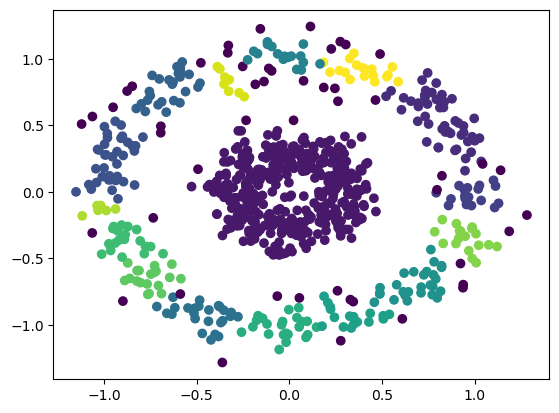

In [33]:
plt.scatter(x[:,0],x[:,1],c=dbscan.labels_)

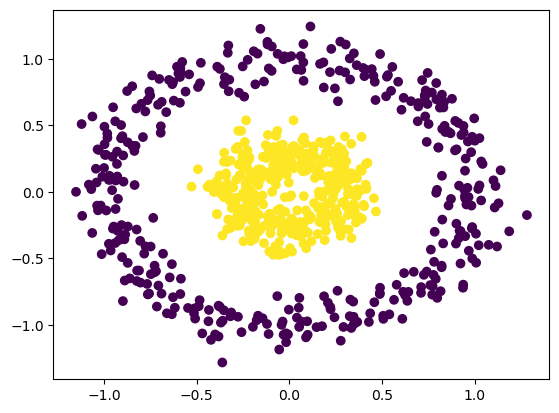

In [34]:
plt.scatter(x[:,0],x[:,1],c=y)

Local Outlier Factors

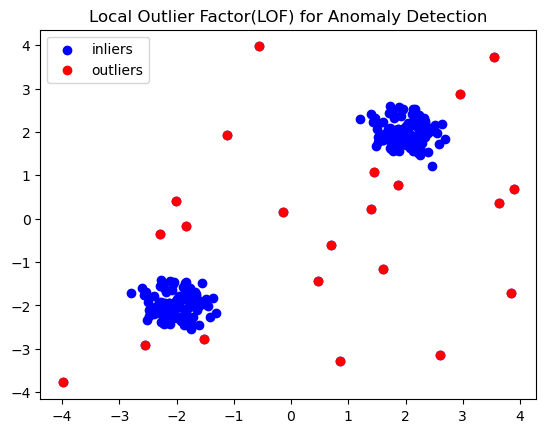

In [35]:
from sklearn.neighbors import LocalOutlierFactor
x_inliers=0.3*np.random.randn(100,2)
x_inliers=np.r_[x_inliers+2,x_inliers-2]

x_outliers=np.random.uniform(low=-4,high=4,size=(20,2))
x=np.r_[x_inliers,x_outliers]

clf=LocalOutlierFactor(n_neighbors=20,contamination=0.1)
y_pred=clf.fit_predict(x)

plt.title("Local Outlier Factor(LOF) for Anomaly Detection")
plt.scatter(x[:,0],x[:,1],color='b',label='inliers')
plt.scatter(x[y_pred==-1,0],x[y_pred==-1,1],color='r',label='outliers')
plt.legend()
plt.show()